In [1]:
import os
from io import open 

"""Writing the data per file into a dictionary for which the key is the category of news"""

import unicodedata
import string

all_letters = string.ascii_letters + ".,;'& "
n_letters = len(all_letters)

def unitoAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

def readFile_byline(filename):
    line_of_news = open("news_data_final/"+filename , encoding = 'utf-8').read().split('\n')    
    return [unitoAscii(line) for line in line_of_news]

In [2]:
category_news = {}
all_categories = []

list_of_files = os.listdir("news_data_final/")

#Dictionary which maps every category of news to it's description
for _file in list_of_files:
    category = _file.split(".")[0]
    all_categories.append(category)
    news_descp = readFile_byline(_file)
    category_news[category] = news_descp

num_categories = len(all_categories)
print(num_categories)

count_of_news_category = {}
average_words_per_number_of_samples = []

#Counting news items per category of news 
for key in category_news.keys():
    item = category_news.get(key)
    number_of_news_items = len(item)
    count_of_news_category[key] = number_of_news_items
    count_of_words = 0
    for sentence in item:
        count_of_words += len(sentence.split(" "))
    average_words_per_number_of_samples.append(count_of_words/number_of_news_items)

#print(count_of_news_category["WELLNESS"])
#print(category_news["CRIME"][0:2])
#print(average_words_per_number_of_samples)

29


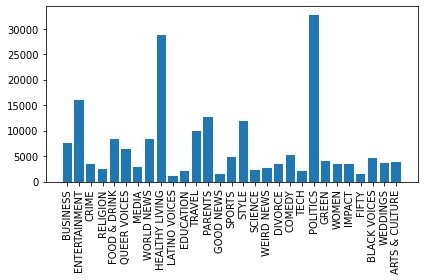

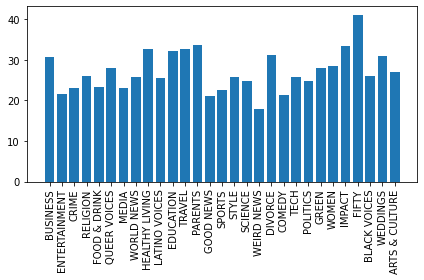

In [3]:
import random
import matplotlib
import matplotlib.pyplot as plt 

fig = plt.figure()
category = count_of_news_category.keys()
value = count_of_news_category.values()
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Number_of_articles_per_category.png')
plt.show()

fig1 = plt.figure()
category = count_of_news_category.keys()
value = average_words_per_number_of_samples
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Words_per_category.png')
plt.show()


In [4]:
import torch
import torch.nn as nn 
from torch import optim
import torch.nn.functional as F 

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#print(device)

def findIndexOfWordInSentence(sentence):
    indexOfWord = {}
    for index, word in enumerate(sentence):
        indexOfWord[word] = index
    return list(indexOfWord.values())

def sentenceToTensor(sentence):
    indexes = findIndexOfWordInSentence(sentence)
    return torch.tensor(indexes , dtype = torch.long, device = device).view(-1, 1)

category_plus_news_list = []

from nltk.corpus import stopwords

for key in category_news.keys():
    for news_item in category_news[key]:
        #news_item = [word for word in news_item.split(" ") if word not in stopwords.words('english')]
        #news_item = " ".join(word for word in news_item)
        category_plus_news_list.append((key, news_item))

print(category_plus_news_list[0])

def pairedTensor(pair):
    #pair is element in category_plus_news_list
    input_tensor = sentenceToTensor(pair[1])
    output_tensor = sentenceToTensor(pair[0])
    return (input_tensor, output_tensor)

#print(pairedTensor(category_plus_news_list[100]))

unique_words = []

'''for pair in category_plus_news_list:
    for word in pair[1].split(" "):
        if word.lower() not in unique_words:
            unique_words.append(word.lower())

print(unique_words[0:50])'''

('BUSINESS', 'U.S. Launches Auto Import Probe, China Vows To Defend Its Interests. The investigation could lead to new U.S. tariffs similar to those imposed on imported steel and aluminum in March.')


'for pair in category_plus_news_list:\n    for word in pair[1].split(" "):\n        if word.lower() not in unique_words:\n            unique_words.append(word.lower())\n\nprint(unique_words[0:50])'

In [5]:
#from sentence_transformers import SentenceTransformer
#model = SentenceTransformer("bert-base-nli-mean-tokens")




#sentence_embeddings = model.encode(category_plus_news_list[0][1])
#print(category_plus_news_list[0][1])
#print(sentence_embeddings)

In [6]:
#sentence_embeddings.shape

In [7]:
from models import InferSent
model_version = 2
MODEL_PATH = "encoder/infersent%s.pkl" % model_version
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': model_version}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))


use_cuda = True
model = model.to(torch.device('cuda:0')) if use_cuda else model

W2V_PATH = 'fastText/crawl-300d-2M.vec'
model.set_w2v_path(W2V_PATH)
model.build_vocab_k_words(K=1000000)

Vocab size : 1000000


In [8]:
list_of_sentences_business = []
list_of_sentences_politics = []
list_of_sentences_religion = []
list_of_sentences_food = []
list_of_sentences_home = []

list_of_sentences = []

labels =[]
count_of_lables=[]

for pair in category_plus_news_list:
    label = pair[0]
    sentences = pair[1].split(". ")
    for sentence in sentences:
        if len(sentence.split(" ")) >= 5:
            list_of_sentences.append(sentence)
            labels.append(label)
            
    
#print(list_of_sentences[0:20])
print(len(list_of_sentences))
#print((labels[0:20]))
print(len(labels))


'''for pair in category_plus_news_list:
    if pair[0]=='BUSINESS':
        sentences_business = pair[1].split(". ")
        for sentence in sentences_business:
            list_of_sentences_business.append(sentence)
    if pair[0]=='POLITICS':
        sentences_politics = pair[1].split(". ")
        for sentence in sentences_politics:
            list_of_sentences_politics.append(sentence)
    if pair[0]=='RELIGION':
        sentences_religion = pair[1].split(". ")
        for sentence in sentences_religion:
            list_of_sentences_religion.append(sentence)
    if pair[0]=='FOOD & DRINK':
        sentences_food = pair[1].split(". ")
        for sentence in sentences_food:
            list_of_sentences_food.append(sentence)
    if pair[0]=='HOME & LIVING':
        sentences_home = pair[1].split(". ")
        for sentence in sentences_home:
            list_of_sentences_home.append(sentence)'''
    
        

399242
399242


'for pair in category_plus_news_list:\n    if pair[0]==\'BUSINESS\':\n        sentences_business = pair[1].split(". ")\n        for sentence in sentences_business:\n            list_of_sentences_business.append(sentence)\n    if pair[0]==\'POLITICS\':\n        sentences_politics = pair[1].split(". ")\n        for sentence in sentences_politics:\n            list_of_sentences_politics.append(sentence)\n    if pair[0]==\'RELIGION\':\n        sentences_religion = pair[1].split(". ")\n        for sentence in sentences_religion:\n            list_of_sentences_religion.append(sentence)\n    if pair[0]==\'FOOD & DRINK\':\n        sentences_food = pair[1].split(". ")\n        for sentence in sentences_food:\n            list_of_sentences_food.append(sentence)\n    if pair[0]==\'HOME & LIVING\':\n        sentences_home = pair[1].split(". ")\n        for sentence in sentences_home:\n            list_of_sentences_home.append(sentence)'

In [9]:
#embeddings_business = model.encode(list_of_sentences_business, bsize=128, tokenize=False, verbose=True)
embeddings = model.encode(list_of_sentences, bsize=128, tokenize=False, verbose=True)
#embeddings_politics = model.encode(list_of_sentences_politics, bsize=128, tokenize=False, verbose=True)
#embeddings_religion = model.encode(list_of_sentences_religion, bsize=128, tokenize=False, verbose=True)
#embeddings_food = model.encode(list_of_sentences_food, bsize=128, tokenize=False, verbose=True)
#embeddings_home = model.encode(list_of_sentences_home, bsize=128, tokenize=False, verbose=True)
#print('nb sentences encoded : {0}'.format(len(embeddings_business)))
#print(embeddings_business.shape)
print('nb sentences encoded : {0}'.format(len(embeddings)))
print(embeddings.shape)

Nb words kept : 5615899/6020164 (93.3%)


/scratch/sidray/Attentive-recurrent-neural-networks-for-categorizing-and-generating-news/models.py:207: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  sentences = np.array(sentences)[idx_sort]


Speed : 5014.1 sentences/s (gpu mode, bsize=128)
nb sentences encoded : 399242
(399242, 4096)


In [10]:
def letterToIndex(letter):
    return all_letters.find(letter)


def wordToTensor(word):
    tensor = torch.zeros(len(word), 1, n_letters)
    for li, letter in enumerate(word):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [11]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

sentences = list(category_news.keys())

def to_matrix(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]

corpus = to_matrix(sentences, 1)
#print(corpus)

model = Word2Vec(sentences=corpus, size=300, window=5, min_count=1, workers=4)
model.save("word2vec.model")

vector = model.wv['ARTS & CULTURE']
#print(vector)

In [12]:
label_list = list(category_news.keys())
index_class_map_dict={}

for idx, value in enumerate(label_list):
    index_class_map_dict[value]=idx

print(index_class_map_dict)

{'BUSINESS': 0, 'ENTERTAINMENT': 1, 'CRIME': 2, 'RELIGION': 3, 'FOOD & DRINK': 4, 'QUEER VOICES': 5, 'MEDIA': 6, 'WORLD NEWS': 7, 'HEALTHY LIVING': 8, 'LATINO VOICES': 9, 'EDUCATION': 10, 'TRAVEL': 11, 'PARENTS': 12, 'GOOD NEWS': 13, 'SPORTS': 14, 'STYLE': 15, 'SCIENCE': 16, 'WEIRD NEWS': 17, 'DIVORCE': 18, 'COMEDY': 19, 'TECH': 20, 'POLITICS': 21, 'GREEN': 22, 'WOMEN': 23, 'IMPACT': 24, 'FIFTY': 25, 'BLACK VOICES': 26, 'WEDDINGS': 27, 'ARTS & CULTURE': 28}


In [13]:
embedded_sentences = []

for index, embedding in enumerate(embeddings):
    input_vector = embedding
    target_vector = labels[index]
    target_class = index_class_map_dict[target_vector]
    #target_vector = model.wv[labels[index]]
    embedded_sentences.append((input_vector, target_class))

#print(embedded_sentences[0][1].shape)

In [14]:
'''label_list = list(category_news.keys())

for label in labels:
    for idx, value in enumerate(label_list):
        if label == value:
            labels[labels.index(label)] = idx'''
            


'label_list = list(category_news.keys())\n\nfor label in labels:\n    for idx, value in enumerate(label_list):\n        if label == value:\n            labels[labels.index(label)] = idx'

In [15]:
label_list = list(category_news.keys())
index_class_map=[]

for idx, value in enumerate(label_list):
    index_class_map.append((idx,value))

print(index_class_map)
    
    

[(0, 'BUSINESS'), (1, 'ENTERTAINMENT'), (2, 'CRIME'), (3, 'RELIGION'), (4, 'FOOD & DRINK'), (5, 'QUEER VOICES'), (6, 'MEDIA'), (7, 'WORLD NEWS'), (8, 'HEALTHY LIVING'), (9, 'LATINO VOICES'), (10, 'EDUCATION'), (11, 'TRAVEL'), (12, 'PARENTS'), (13, 'GOOD NEWS'), (14, 'SPORTS'), (15, 'STYLE'), (16, 'SCIENCE'), (17, 'WEIRD NEWS'), (18, 'DIVORCE'), (19, 'COMEDY'), (20, 'TECH'), (21, 'POLITICS'), (22, 'GREEN'), (23, 'WOMEN'), (24, 'IMPACT'), (25, 'FIFTY'), (26, 'BLACK VOICES'), (27, 'WEDDINGS'), (28, 'ARTS & CULTURE')]


In [16]:
label_list = list(category_news.keys())
index_class_map=[]

for idx, value in enumerate(label_list):
    index_class_map.append((idx,value))

print(index_class_map)


label_list = list(category_news.keys())
index_class_map_dict={}

for idx, value in enumerate(label_list):
    index_class_map_dict[idx]=value

print(index_class_map_dict.keys())

    

[(0, 'BUSINESS'), (1, 'ENTERTAINMENT'), (2, 'CRIME'), (3, 'RELIGION'), (4, 'FOOD & DRINK'), (5, 'QUEER VOICES'), (6, 'MEDIA'), (7, 'WORLD NEWS'), (8, 'HEALTHY LIVING'), (9, 'LATINO VOICES'), (10, 'EDUCATION'), (11, 'TRAVEL'), (12, 'PARENTS'), (13, 'GOOD NEWS'), (14, 'SPORTS'), (15, 'STYLE'), (16, 'SCIENCE'), (17, 'WEIRD NEWS'), (18, 'DIVORCE'), (19, 'COMEDY'), (20, 'TECH'), (21, 'POLITICS'), (22, 'GREEN'), (23, 'WOMEN'), (24, 'IMPACT'), (25, 'FIFTY'), (26, 'BLACK VOICES'), (27, 'WEDDINGS'), (28, 'ARTS & CULTURE')]
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])


In [69]:
class RNN(nn.Module):
    """ Simple RNN architecture with one ReLU layer for 
    the input embedding followed by one GRU layer"""
    
    def __init__(self, input_size, hidden_size,output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, input, hidden):
        embedded = input.unsqueeze(0)
        #print(embedded.shape)
        output, hidden = self.gru(embedded, hidden)
        output = self.fc(hidden).squeeze(0)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)
    
print(device)

cuda:0


In [70]:
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

In [71]:
def get_batch(data, batch_size):
    batch = []
    for i in range(1,batch_size):
        rand_no = random.randint(0,len(data)-1)
        batch.append(data[rand_no])
    return batch
        
   


In [72]:
learning_rate = 0.0001

def train(input_tensor, target_tensor, model, model_optimizer, criterion):
    
    model_hidden = model.initHidden()
    model_optimizer.zero_grad()

    input_length = input_tensor.shape
    target_length = target_tensor.shape
    #print(input_length)
    #print(target_length)
    
    #for i in range(input_length):
    output, hidden = model(input_tensor, model_hidden)
    #print(output.shape)
    
    #print(output.size(-1))
    #print(target_tensor.size(-1))
        
    loss = criterion(output, target_tensor)
    loss.backward()
    
    '''for p in model.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)'''
    
    model_optimizer.step()
    #return output

    return output, loss.item()

In [73]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [74]:
def trainIters(model, n_iters, embedded, print_every, plot_every=100, learning_rate=learning_rate):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    #TODO: Try ADAM
    model_optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    training_pairs = [randomChoice(embedded) for i in range(n_iters)]
    
    criterion = nn.CrossEntropyLoss()
    
    for _iter in range(1, n_iters+1):
        #batch = get_batch(training_pairs, batch_size)
        
        input_tensor = torch.from_numpy(training_pairs[_iter-1][0]).float().unsqueeze(0).to(device)
        target_tensor = torch.tensor(training_pairs[_iter-1][1]).view(-1).to(device)
            
        loss = train(input_tensor, target_tensor, model,
                     model_optimizer, criterion)[1]
        print_loss_total += loss
        plot_loss_total += loss
        
        if _iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, _iter / n_iters),
                                         _iter, _iter / n_iters * 100, print_loss_avg))

        if _iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0
            
    showPlot(plot_losses)
        

In [78]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure(figsize=(25,25))
    #fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

In [76]:
hidden_size = 512
input_size = embeddings.shape[1]
output_size = 29
#print(input_size)

model = RNN(input_size, hidden_size, output_size).to(device)

random.shuffle(embedded_sentences)

#Take 80% of the samples as training data
num = int(0.8 * len(embedded_sentences))
#print(num)

embedded_final = []
for i in range(num):
    embedded_final.append(embedded_sentences[i])
#print(embedded_final[0][0])


0m 18s (- 19m 38s) (5000 1%) 2.5737
0m 37s (- 19m 10s) (10000 3%) 2.1056
0m 55s (- 18m 42s) (15000 4%) 1.9688
1m 13s (- 18m 19s) (20000 6%) 1.8839
1m 31s (- 17m 58s) (25000 7%) 1.8539
1m 49s (- 17m 38s) (30000 9%) 1.8183
2m 7s (- 17m 19s) (35000 10%) 1.8038
2m 25s (- 16m 59s) (40000 12%) 1.7693
2m 44s (- 16m 40s) (45000 14%) 1.7709
3m 2s (- 16m 21s) (50000 15%) 1.8010
3m 20s (- 16m 3s) (55000 17%) 1.7694
3m 38s (- 15m 44s) (60000 18%) 1.7473
3m 56s (- 15m 26s) (65000 20%) 1.7266
4m 14s (- 15m 7s) (70000 21%) 1.7497
4m 32s (- 14m 49s) (75000 23%) 1.7185
4m 51s (- 14m 30s) (80000 25%) 1.7183
5m 9s (- 14m 12s) (85000 26%) 1.7636
5m 27s (- 13m 55s) (90000 28%) 1.7132
5m 45s (- 13m 37s) (95000 29%) 1.7054
6m 4s (- 13m 19s) (100000 31%) 1.6965
6m 22s (- 13m 0s) (105000 32%) 1.6976
6m 40s (- 12m 42s) (110000 34%) 1.6943
6m 58s (- 12m 24s) (115000 36%) 1.6779
7m 17s (- 12m 6s) (120000 37%) 1.6628
7m 35s (- 11m 48s) (125000 39%) 1.6541
7m 53s (- 11m 30s) (130000 40%) 1.6714
8m 11s (- 11m 11s) (

<Figure size 1800x1800 with 0 Axes>

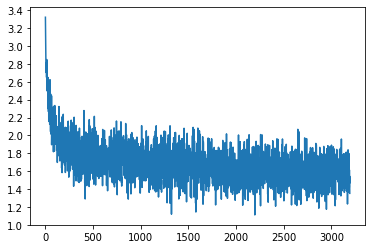

In [77]:
trainIters(model, num, embedded_final, print_every=5000)

In [ ]:
import math 
class RNN(nn.Module):
    """ Simple RNN architecture with one ReLU layer for 
    the input embedding followed by one GRU layer"""
    
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        #self.hidden_size = hidden_size
        fc1 = nn.Linear(input_size, hidden_size)
        fc2 = nn.Linear(hidden_size, output_size)
        nn.init.normal_(fc1.weight, std = math.sqrt(1/input_size))
        nn.init.normal_(fc2.weight, std = math.sqrt(1/hidden_size))
        self.net = nn.Sequential(fc1,nn.SELU(),fc2)
        
    def forward(self, input, hidden):
        #embedded = input.unsqueeze(0)
        #print(embedded.shape)
        #output, hidden = self.gru(embedded, hidden)
        #output = self.fc(hidden).squeeze(0)
        return self.net(input) , None

    def initHidden(self):
        #return torch.zeros(1, 1, self.hidden_size, device=device)
        pass
    
print(device)